In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/revenue-data.csv')

In [4]:
data.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [5]:
X = data['Age']
y = data['Salary']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [8]:
import pandas as np

In [9]:
X_train = np.array(X_train).reshape((len(X_train),1))
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

In [10]:
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [11]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

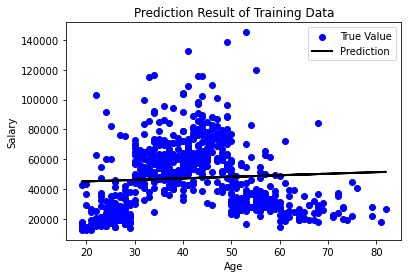

In [12]:
y_train_pred = model.predict(X_train)

plt.figure()
plt.scatter(X_train, y_train, color='blue', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title('Prediction Result of Training Data')
plt.legend()
plt.show()

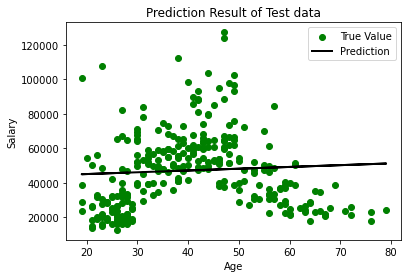

In [13]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='green', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [14]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,GCSE,Public Sector,Female,North West,22306.84
996,54,155.42,231.17,5,Other,Private sector,Male,Wales,27704.97
997,22,2376.10,287.15,11,Other,Private sector,Male,South East,62542.89
998,49,4355.04,27.78,0,Degree,Private sector,Male,Northern Ireland,96745.84


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


data["Education"] = le.fit_transform(data['Education'])
data["WorkType"] = le.fit_transform(data["WorkType"])
data['Sex'] = le.fit_transform(data['Sex'])
data['Region'] =  le.fit_transform(data['Region'])


In [16]:
data

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,1,0,1,2,60173.49
1,20,3758.36,149.36,4,2,0,0,7,42965.45
2,36,601.72,21.87,0,3,0,1,1,54924.41
3,21,44.89,182.80,9,3,0,0,5,26734.99
4,24,614.80,194.34,0,2,0,1,6,15325.23
...,...,...,...,...,...,...,...,...,...
995,56,177.67,272.87,5,2,1,0,4,22306.84
996,54,155.42,231.17,5,5,0,1,9,27704.97
997,22,2376.10,287.15,11,5,0,1,7,62542.89
998,49,4355.04,27.78,0,1,0,1,5,96745.84


In [17]:
from sklearn import preprocessing
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(data_scaled)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.0,1.0,0.181818,0.359470
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.0,0.0,0.636364,0.229875
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.0,1.0,0.090909,0.319939
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.0,0.0,0.454545,0.107643
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.0,1.0,0.545455,0.021716


In [19]:
df.columns = data.columns

In [20]:
df

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,0.206349,0.062878,0.084627,0.000000,0.166667,0.000000,1.0,0.181818,0.359470
1,0.015873,0.854345,0.487710,0.235294,0.333333,0.000000,0.0,0.636364,0.229875
2,0.269841,0.128979,0.056666,0.000000,0.500000,0.000000,1.0,0.090909,0.319939
3,0.031746,0.001025,0.600771,0.529412,0.500000,0.000000,0.0,0.454545,0.107643
4,0.079365,0.131985,0.639788,0.000000,0.333333,0.000000,1.0,0.545455,0.021716
...,...,...,...,...,...,...,...,...,...
995,0.587302,0.031536,0.905298,0.294118,0.333333,0.333333,0.0,0.363636,0.074295
996,0.555556,0.026424,0.764310,0.294118,0.833333,0.000000,1.0,0.818182,0.114948
997,0.047619,0.536715,0.953579,0.647059,0.833333,0.000000,1.0,0.636364,0.377314
998,0.476190,0.991456,0.076647,0.000000,0.166667,0.000000,1.0,0.454545,0.634897


In [21]:
X = df.drop(columns= ["Salary"])
y = df.Salary

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


In [24]:
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = tree.DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
# model predicting (placed/not placed) from the test dataset
mean_squared_error(y_test, y_pred)

0.006761304345842157

In [30]:
X_test

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region
521,0.269841,0.415808,0.264767,0.294118,0.333333,0.333333,1.0,0.181818
737,0.428571,0.030438,0.999020,0.411765,0.500000,0.333333,0.0,0.000000
740,0.301587,0.000977,0.053792,0.000000,0.166667,1.000000,0.0,1.000000
660,0.142857,0.052872,0.240964,0.000000,1.000000,0.000000,1.0,0.727273
411,0.253968,0.020182,0.932346,0.235294,0.833333,0.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...
408,0.428571,0.413563,0.935051,0.647059,0.166667,0.000000,0.0,0.909091
332,0.206349,0.005253,0.436150,0.235294,0.333333,0.000000,1.0,0.181818
208,0.904762,0.020056,0.916320,0.352941,0.500000,0.666667,1.0,0.090909
613,0.031746,0.460748,0.837678,0.352941,0.500000,0.000000,0.0,0.636364


In [32]:
y_pred

array([0.37432385, 0.45647866, 0.21342268, 0.03871971, 0.25570336,
       0.39140549, 0.09112848, 0.02846577, 0.0608811 , 0.18754872,
       0.04572891, 0.31549005, 0.03871971, 0.364755  , 0.44111356,
       0.50082209, 0.36653918, 0.05027358, 0.05351192, 0.21555396,
       0.03871971, 0.40998528, 0.03909438, 0.26335247, 0.30373435,
       0.05937354, 0.35173333, 0.06746058, 0.58340602, 0.40107141,
       0.35927852, 0.36017727, 0.12874625, 0.34409386, 0.38606539,
       0.20291193, 0.27257345, 0.19450776, 0.56901837, 0.48437787,
       0.23979919, 0.13528928, 0.02009714, 0.28914427, 0.03608626,
       0.03697522, 0.35118033, 0.35338858, 0.57463042, 0.48623585,
       0.24270082, 0.00425563, 0.11315786, 0.04758613, 0.38404226,
       0.35173333, 0.13631644, 0.37999169, 0.40998528, 0.33388398,
       0.51863868, 0.28389492, 0.29389845, 0.20223918, 0.39140549,
       0.39374862, 0.06288639, 0.05599814, 0.20223918, 0.11315786,
       0.04850123, 0.03851501, 0.10764342, 0.3078075 , 0.29346

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(n_estimators=1000, random_state= 43)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("MSE is ", mean_squared_error(y_test, y_pred))

MSE is  0.0032351259127586336


In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Lets define models with different neighbours

for i in range(1,11):
  neigh = KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train, y_train)

  y_pred = neigh.predict(X_test)
  print("n_Neighbour = " + str(i) + " MSE = " + str(mean_squared_error(y_test, y_pred)))

n_Neighbour = 1 MSE = 0.029881717859946214
n_Neighbour = 2 MSE = 0.01900653663828257
n_Neighbour = 3 MSE = 0.019308162445233406
n_Neighbour = 4 MSE = 0.018731702014963048
n_Neighbour = 5 MSE = 0.0189074495889449
n_Neighbour = 6 MSE = 0.018683865193557886
n_Neighbour = 7 MSE = 0.018492705888642314
n_Neighbour = 8 MSE = 0.01899689038145562
n_Neighbour = 9 MSE = 0.019616049709476748
n_Neighbour = 10 MSE = 0.01948528659423494
